Criar tabuleiro

In [1]:
import numpy as np
import pygame, sys
import time
import math
import copy
import random
from button import Button

WIN_X = 512
WIN_O = -512
DRAW = 0
MOVE_BONUS_X = 16
MOVE_BONUS_O = -16
SEGMENT_VALUES_O = {0: 0, 1: -1, 2: -10, 3: -50}
SEGMENT_VALUES_X = {0: 0, 1: 1, 2: 10, 3: 50}

def create_board():
    board = [[0 for _ in range(7)] for _ in range(6)]
    return board

pygame 2.3.0 (SDL 2.24.2, Python 3.9.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


Definições Pygame e função Menu

In [2]:
pygame.init()

SCREEN = pygame.display.set_mode((1280, 720))
pygame.display.set_caption("Menu")

BG = pygame.image.load("assets/Background.png")

def get_font(size):
    return pygame.font.Font("assets/font.ttf", size)

def a_star_m():
    while True:
        a_star_game()
        pygame.display.update()

def monte_carlo_m():
    while True:
        mc_game()
        pygame.display.update()
        
def minimax_m():
    while True:
        minimax_game()
        pygame.display.update()

def pvp_m():
    while True:
        pvp_game()
        pygame.display.update()

def bab_m():
    while True:
        bab_game()
        pygame.display.update()


def main_menu():
    while True:
        SCREEN.blit(BG, (0, 0))

        MENU_MOUSE_POS = pygame.mouse.get_pos()

        MENU_TEXT = get_font(100).render("MAIN MENU", True, "#b68f40")
        MENU_RECT = MENU_TEXT.get_rect(center=(640, 100))

        ASTAR_BUTTON = Button(image=pygame.image.load("assets/Play Rect.png"), pos=(370, 250), 
                            text_input="A*", font=get_font(75), base_color="#d7fcd4", hovering_color="White")
        MC_BUTTON = Button(image=pygame.image.load("assets/Play Rect.png"), pos=(370, 380), 
                            text_input="MONTE CARLO", font=get_font(30), base_color="#d7fcd4", hovering_color="White")
        PVP_BUTTON = Button(image=pygame.image.load("assets/Play Rect.png"), pos=(370, 510), 
                            text_input="PVP", font=get_font(75), base_color="#d7fcd4", hovering_color="White")
        MINIMAX_BUTTON = Button(image=pygame.image.load("assets/Play Rect.png"), pos=(910, 250),
                            text_input="MINIMAX", font=get_font(45), base_color="#d7fcd4", hovering_color="White")
        BAB_BUTTON = Button(image=pygame.image.load("assets/Play Rect.png"), pos=(910, 380),
                            text_input="BAB", font=get_font(75), base_color="#d7fcd4", hovering_color="White")
        QUIT_BUTTON = Button(image=pygame.image.load("assets/Play Rect.png"), pos=(910, 510), 
                            text_input="QUIT", font=get_font(75), base_color="#d7fcd4", hovering_color="White")
        
        SCREEN.blit(MENU_TEXT, MENU_RECT)

        for button in [ASTAR_BUTTON, MC_BUTTON, QUIT_BUTTON, PVP_BUTTON, MINIMAX_BUTTON, BAB_BUTTON]:
            button.changeColor(MENU_MOUSE_POS)
            button.update(SCREEN)

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                sys.exit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if ASTAR_BUTTON.checkForInput(MENU_MOUSE_POS):
                    a_star_m()
                if MC_BUTTON.checkForInput(MENU_MOUSE_POS):
                    monte_carlo_m()
                if PVP_BUTTON.checkForInput(MENU_MOUSE_POS):
                    pvp_m()
                if MINIMAX_BUTTON.checkForInput(MENU_MOUSE_POS):
                    minimax_m()
                if BAB_BUTTON.checkForInput(MENU_MOUSE_POS):
                    bab_m()
                if QUIT_BUTTON.checkForInput(MENU_MOUSE_POS):
                    pygame.quit()
                    sys.exit()
                

        pygame.display.update()

Verificar se a coluna escolhida tem espaço disponível

In [3]:
def is_empty(board, col):
    return board[5][col] == 0

Procurar a próxima linha livre para ser colocada a próxima peça

In [4]:
def check_next_empty_row(board, col):
    for r in range(6):
        if board[r][col] == 0:
            return r

Função para colocar a peça no seu respetivo lugar

In [5]:
def put_piece(board,row,col,piece):
    board[row][col] = piece

Função que retorna as colunas disponíveis

In [6]:
def get_valid_locations(board):
    res=[]
    for i in range(7):
        if is_empty(board,i):
            res.append(i)
    return res

Função que verifica se o movimento é vencedor

In [7]:
def win(piece, board):

    #check horizontal

    for c in range (4):
        for r in range(6):
            if board[r][c] == piece and board[r][c+1] == piece and board[r][c+2] == piece and board[r][c+3] == piece:
                return True
            
    #check vertical
            
    for c in range(7):
        for r in range(3):
            if board[r][c] == piece and board[r+1][c] == piece and board[r+2][c] == piece and board[r+3][c] == piece:
                return True
            
    #check diagonal negativa
            
    for c in range(4):
        for r in range(3):
            if board[r][c] == piece and board[r+1][c+1] == piece and board[r+2][c+2] == piece and board[r+3][c+3] == piece:
                return True

    #check diagonal negativa
        
    for c in range(4):
        for r in range(3,6):
            if board[r][c] == piece and board[r-1][c+1] == piece and board[r-2][c+2] == piece and board[r-3][c+3] == piece:
                return True

Função que verifica que se estado atual do board é de empate

In [8]:
def draw(board):
    if win(1,board) or win(2,board):
        return False
    for i in range (6):
        for j in range(7):
            if board[i][j]==0:
                return False
    return True


Definições Pygame

In [9]:
# Definições de cores
BLACK = (0, 0, 0)
BLUE = (0, 0, 255)
RED = (255, 0, 0)
YELLOW = (255, 255, 0)
WHITE = (255, 255, 255)

# Configurações do tabuleiro
ROW_COUNT = 6
COLUMN_COUNT = 7

# Inicialização do Pygame
pygame.init()

# Configurações da janela
WIDTH=1280
HEIGHT=720
WINDOW_SIZE = (1280, 720)
screen = pygame.display.set_mode(WINDOW_SIZE)
pygame.display.set_caption("Connect 4")
FONT = pygame.font.SysFont(None, 36)
WIN = pygame.display.set_mode((WIDTH, HEIGHT))

Função que desenha o board no Pygame

In [10]:
def draw_board(board):
    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT):
            pygame.draw.rect(screen, BLUE, (c * 180.8, r * 120, 182.8, 120))
            pygame.draw.circle(screen, BLACK, (c * 182.8 + 91.4, r * 105 + 60), 50)

    for c in range(COLUMN_COUNT):
        for r in range(ROW_COUNT):
            if board[r][c] == 1:
                pygame.draw.circle(screen, RED, (c * 182.8 + 91.4, 586 - r * 105), 52)
            elif board[r][c] == 2:
                pygame.draw.circle(screen, YELLOW, (c * 182.8 + 91.4, 586 - r * 105), 52)
    
    BACK_MOUSE_POS = pygame.mouse.get_pos()

    BACK = Button(image=None, pos=(1100, 675),
                            text_input="BACK", font = get_font(40), base_color="Black", hovering_color="Green")
    
    BACK.changeColor(BACK_MOUSE_POS)
    BACK.update(SCREEN)


    pygame.display.update()



Função Connect Four - Player vs Player

In [11]:
def pvp_game():
    board = [[0 for _ in range(7)] for _ in range(6)] #Criar o board
    game_over = False
    turn = 0
    
    draw_board(board) #Desenhar o board no pygame

    PVP_MOUSE_POS = pygame.mouse.get_pos()


    PVP_BACK = Button(image=None, pos=(1100, 675),
                            text_input="BACK", font = get_font(40), base_color="Black", hovering_color="Green")
        
    PVP_BACK.changeColor(PVP_MOUSE_POS)
    PVP_BACK.update(SCREEN)
    
    while not game_over:
        
        PVP_MOUSE_POS = pygame.mouse.get_pos() #Obtem a posição do rato

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

            if event.type == pygame.MOUSEBUTTONDOWN:
                if PVP_BACK.checkForInput(PVP_MOUSE_POS):
                    main_menu()

            if event.type == pygame.MOUSEBUTTONDOWN:
                posx = event.pos[0]
                col = int(posx // 182.8)

                if turn == 0: #Move do 1ºJogador
                    valid_move = False
                    while not valid_move:
                        if is_empty(board, col): #Confirma se o move pretendido é válido
                            valid_move=True
                            row = check_next_empty_row(board, col) #Vê em que fila vai cair a peça
                            put_piece(board, row, col, 1) # Coloca a peça no board

                            if win(1, board):
                                print('Player 1 wins!')
                                game_over = True 
                                draw_board(board)
                                time.sleep(5) 
                                main_menu()
                        else:
                            print("Try again!")
                else: # Move do 2ºJogador
                    valid_move = False
                    while not valid_move:
                        if is_empty(board, col):  # Confirma se o move pretendido é válido
                            valid_move=True
                            row = check_next_empty_row(board, col) # Vê em que fila vai cair a peça
                            put_piece(board, row, col, 2) # Coloca a peça no board

                            if win(2, board):
                                print('Player 2 wins!')
                                game_over = True
                                draw_board(board)
                                time.sleep(5)
                                main_menu()
                        else:
                            print("Try again!")

                turn += 1 
                turn = turn % 2 # Atualiza para ver quem joga

                draw_board(board)
    pygame.quit()
    quit()

Funções secundárias avaliadoras do board

In [12]:
def evaluate_board(board): #Função que avalia o board
    score = 0

    for row in board: #Começa por avaliar os segmentos horizontais
        for i in range(len(row) - 3):
            segment = row[i:i+4]
            score += evaluate_segment(segment)

    for col in range(len(board[0])): #De seguida avalia os segmentos verticais
        for i in range(len(board) - 3):
            segment = [board[j][col] for j in range(i, i+4)]
            score += evaluate_segment(segment)

    for i in range(len(board) - 3): #Depois avalia os segmentos na diagonal negativa
        for j in range(len(board[0]) - 3):
            segment = [board[i+k][j+k] for k in range(4)]
            score += evaluate_segment(segment)

    for i in range(3, len(board)): #Depois avalia os segmentos na diagonal negativa
        for j in range(len(board[0]) - 3):
            segment = [board[i-k][j+k] for k in range(4)]
            score += evaluate_segment(segment)

    #Atribui os bonús segundo quem tem a vez de jogar        
    num_x = sum(row.count(1) for row in board)
    num_o = sum(row.count(2) for row in board)
    score += MOVE_BONUS_X if num_x == num_o else MOVE_BONUS_O

    return score

def evaluate_segment(segment):
    #Avalia segmentos de 4 elementos cada
    x_count = segment.count(1)
    o_count = segment.count(2)
    if x_count == 4:
        return WIN_X
    elif o_count == 4:
        return WIN_O
    elif x_count == 0:
        return SEGMENT_VALUES_O[o_count]  #Retorna a pontuação segundo a contagem de O's
    elif o_count == 0:
        return SEGMENT_VALUES_X[x_count]   #Retorna a pontuação segundo a contagem de X's
    else:
        return 0 

Função do Algoritmo BAB

In [13]:
def bab(board): #Função do algoritmo BAB (Barros-Arrobas-Barão)
    best_move = None
    best_score = -512

    for column in range(0,7): #Para cada coluna, se for possível jogar, avalia o board e calcula a melhor jogada
        if is_empty(board, column):
            row = check_next_empty_row(board, column)
            new_board1 = copy.deepcopy(board)
            new_board2=copy.deepcopy(board) #Faz uma cópia do tabuleiro de forma a que não afete o original
            new_board1[row][column] = 1
            new_board2[row][column] = 2
            if win(2,new_board2):
                return column
            score = evaluate_board(new_board1)
            if score > best_score: #Atualiza o best score segundo a melhor jogada
                best_score = score
                best_move = column

    return best_move

Função do Algoritmo A-Star

In [14]:
def a_star(board): #Função do algoritmo A-Star
    best_move = None
    best_score = -512

    for column in range(0,7): #Para cada coluna, se for possível jogar, avalia o board e calcula a melhor jogada
        if is_empty(board, column):
            row = check_next_empty_row(board, column)
            new_board = copy.deepcopy(board) #Faz uma cópia do tabuleiro de forma a que não afete o original
            new_board[row][column] = 2
            score = evaluate_board(new_board)
            print(score)
            if score > best_score: #Atualiza o best score segundo a melhor jogada
                best_score = score
                best_move = column

    return best_move # Retorna a jogada ideal segundo o algoritmo

In [15]:
def evaluate_window(window, piece):
	score = 0
	opp_piece = 1
	if piece == 1:
		opp_piece = 2

	if window.count(piece) == 4:
		score += 100
	elif window.count(piece) == 3 and window.count(0) == 1:
		score += 5
	elif window.count(piece) == 2 and window.count(0) == 2:
		score += 2

	if window.count(opp_piece) == 3 and window.count(0) == 1:
		score -= 4

	return score

In [16]:
WINDOW_LENGTH=4
COLUMN_COUNT=7
def score_position(board, piece):
	score = 0

	## Score center column
	center_array=[]
	for i in range(6):
		center_array.append(board[i][3])
	center_count = center_array.count(piece)
	score += center_count * 6

	## Score Horizontal
	for r in range(ROW_COUNT):
		row_array = board[r]
		for c in range(COLUMN_COUNT-3):
			window = row_array[c:c+WINDOW_LENGTH]
			score += evaluate_window(window, piece)

	## Score Vertical
	for c in range(COLUMN_COUNT):
		col_array = []
		for i in range(6):
			col_array.append(board[i][c])
		for r in range(ROW_COUNT-3):
			window = col_array[r:r+WINDOW_LENGTH]
			score += evaluate_window(window, piece)

	## Score posiive sloped diagonal
	for r in range(ROW_COUNT-3):
		for c in range(COLUMN_COUNT-3):
			window = [board[r+i][c+i] for i in range(WINDOW_LENGTH)]
			score += evaluate_window(window, piece)

	for r in range(ROW_COUNT-3):
		for c in range(COLUMN_COUNT-3):
			window = [board[r+3-i][c+i] for i in range(WINDOW_LENGTH)]
			score += evaluate_window(window, piece)

	return score

Função do Algoritmo Minimax

In [17]:
def minimax(board, depth, alpha, beta, maximizingPlayer):
	valid_locations = get_valid_locations(board)
	is_terminal = win(1, board) or win(2, board) or draw(board)
	if depth == 0 or is_terminal:
		if is_terminal:
			if win(2,board):
				return (None, 100000000000000)
			elif win(1,board):
				return (None, -10000000000000)
			else: # Não há mais moves válidos. Jogo acabou.
				return (None, 0)
		else: # Depht é zero
			return (None, score_position(board, 2))
	if maximizingPlayer:
		value = -math.inf
		column = random.choice(valid_locations)
		for col in valid_locations:
			row = check_next_empty_row(board, col) # Verifica a fila em que a peça irá cair
			b_copy = copy.deepcopy(board) # Copia o board de forma a não afetar o original
			put_piece(b_copy, row, col, 2) # Coloca a peça em questão
			new_score = minimax(b_copy, depth-1, alpha, beta, False)[1] # Calcula o score
			if new_score > value:
				value = new_score # Atualiza os valores dos scores
				column = col
			alpha = max(alpha, value)
			if alpha >= beta:
				break
		return column, value

	else: # Jogador Maximizante 
		value = math.inf
		column = random.choice(valid_locations)
		for col in valid_locations:
			row = check_next_empty_row(board, col) # Verifica a fila em que a peça irá cair
			b_copy = copy.deepcopy(board)
			put_piece(b_copy, row, col, 1) # Coloca a peça em questão
			new_score = minimax(b_copy, depth-1, alpha, beta, True)[1] # Calcula o score
			if new_score < value:
				value = new_score # Atualiza os valores dos scores
				column = col
			beta = min(beta, value)
			if alpha >= beta:
				break
		return column, value

Função do Algoritmo Monte Carlo

In [18]:
import random
import math
import time

class MCTSNode:
    def __init__(self, board, move=None, parent=None, player_num=1):
        self.board = board
        self.move = move
        self.parent = parent
        self.children = {}
        self.wins = 0
        self.visits = 0
        self.untried_moves = possible_moves(board)
        self.player_num = player_num

    

    def UCB1(self, total_visits, C=2):
        if self.visits == 0:
            return float('inf')
        win_rate = self.wins / self.visits
        exploration_factor = C * math.sqrt((math.log(total_visits)) / self.visits)
        return win_rate + exploration_factor



    def select_child(self):
        return max(self.children.values(), key=lambda child: child.UCB1(self.visits))


    # Atualização no método add_child para adicionar child no dicionário
    def add_child(self, move, player_num):
        new_board = np.copy(self.board)
        row = check_next_empty_row(new_board, move)
        put_piece(new_board, row, move, player_num)
        child_node = MCTSNode(new_board, move=move, parent=self, player_num=3 - player_num)
        self.untried_moves.remove(move)
        self.children[move] = child_node
        return child_node


    def update(self, result):
        self.visits += 1
        # Verifica se o resultado da simulação corresponde ao jogador deste nó.
        if (result == 1 and self.player_num == 1) or (result == -1 and self.player_num == 2):
            self.wins += 1
        
        elif(result != 0):
           self.wins -= 1

        
def possible_moves(board):
    return [col for col in range(7) if is_empty(board, col)]


def simulate(board, player_num):
    temp_board = np.copy(board)
    temp_player_num = player_num
    while True:
        moves = possible_moves(temp_board)
        if not moves:  # Se não houver mais movimentos possíveis, o jogo termina em empate.
            return 0
        move = random.choice(moves)  # Escolhe um movimento aleatório dentre os movimentos possíveis.
        row = check_next_empty_row(temp_board, move)  # Encontra a próxima linha vazia para a coluna escolhida.
        put_piece(temp_board, row, move, temp_player_num)  # Coloca a peça no tabuleiro.
        if win(temp_player_num, temp_board):  # Verifica se o movimento resulta em vitória.
            return 1 if temp_player_num == 2 else -1
        temp_player_num = 3 - temp_player_num  # Alterna o número do jogador para a próxima jogada.


import time

def MCTS(root, time_limit=5):  # Define o limite de tempo em segundos
    start_time = time.time()
    #iter=0
    while (time.time() - start_time) < time_limit:
        node = root
        #iter+=1
       # Seleção
        while node.children:
            if not node.untried_moves:  # Não tenta expandir se não há movimentos não tentados
                node = node.select_child()
            else:
                break

        if win(node.player_num,node.board): 
            if node.player_num == 2:
                current_result = 1
            else:
                current_result = -1
            
        
        # Expansão
        elif node.untried_moves:
            move = random.choice(node.untried_moves)
            node = node.add_child(move, node.player_num)

            # Simulação
            current_result = simulate(node.board, node.player_num)
        
        # Retropropagação
        
        while node is not None:
            node.update(current_result)
            node = node.parent
    #print(iter)

In [19]:
def monte_carlo(board, player_num=1, time_limit=5):
    root = MCTSNode(board, None, None, player_num)
    MCTS(root, time_limit)
    valid_children = [child for child in root.children.values() if child.visits > 0]
    if not valid_children:
        return None
    
    best_move = max(valid_children, key=lambda x: x.visits).move  
    return best_move

# Mais visitas = 92/100 (5s)
# Mais racio de vitorias = 88/100 (5s)

In [20]:
import pandas as pd

# Dados
dados = {
    'Tempo de Simulação': ['2 seg', '2 seg', '2 seg', '5 seg', '5 seg', '5 seg'],
    'C': [2, 1.4, 0.8, 0.8, 1.4, 2],
    'Resultados': ['58/100', '76/100', '85/100', '88/100', '92/100', '95/100']
}

# Criar DataFrame
df = pd.DataFrame(dados)

# Organizar os dados por Tempo de Simulação de forma ascendente e C de forma descendente para melhor visualização
df = df.sort_values(by=['Tempo de Simulação', 'C'], ascending=[True, False])

# Exibir a tabela
print(df)

  Tempo de Simulação    C Resultados
0              2 seg  2.0     58/100
1              2 seg  1.4     76/100
2              2 seg  0.8     85/100
5              5 seg  2.0     95/100
4              5 seg  1.4     92/100
3              5 seg  0.8     88/100


In [21]:
import pandas as pd

# Dados: número de simulações ao longo do tempo
simulacoes = [
    11968, 12506, 13457, 13443, 14289,
    16691, 19815, 19223, 21384, 26246,
    70030, 126701, 186376, 237883, 183929, 239203
]

# Criar o DataFrame
df_simulacoes = pd.DataFrame(simulacoes, columns=['Número de Simulações 5s'])

# Adicionar uma coluna para representar cada medição ao longo do tempo
df_simulacoes['Jogada'] = range(1, len(simulacoes) + 1)

# Ajustar a ordem das colunas
df_simulacoes = df_simulacoes[['Jogada', 'Número de Simulações 5s']]

# Exibir a tabela
print(df_simulacoes)

    Jogada  Número de Simulações 5s
0        1                    11968
1        2                    12506
2        3                    13457
3        4                    13443
4        5                    14289
5        6                    16691
6        7                    19815
7        8                    19223
8        9                    21384
9       10                    26246
10      11                    70030
11      12                   126701
12      13                   186376
13      14                   237883
14      15                   183929
15      16                   239203


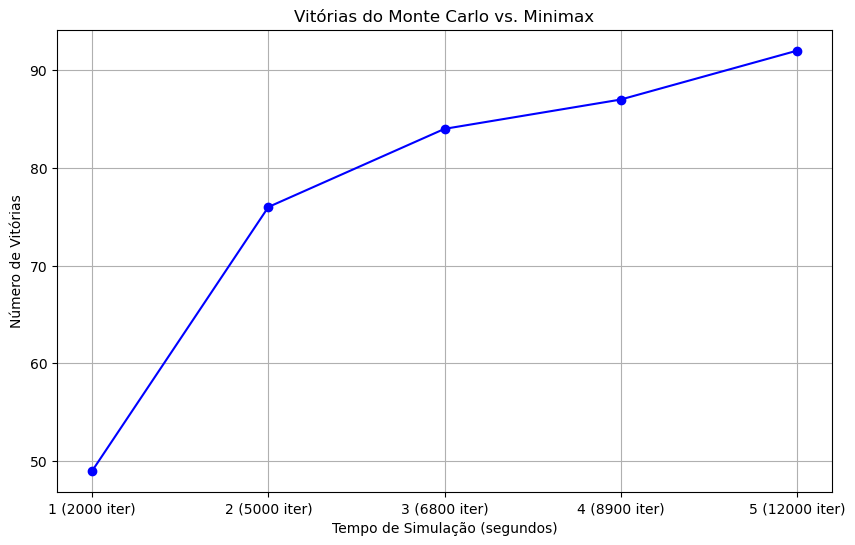

In [22]:
import matplotlib.pyplot as plt

# Tempos de simulação testados
tempos_simulacao = [1, 2, 3, 4, 5]

# Número de vitórias do Monte Carlo para cada tempo de simulação
vitorias_monte_carlo = [49, 76, 84, 87, 92]

# Número de iterações na primeira jogada para cada tempo de simulação
iteracoes_primeira_jogada = ['2000 iter', '5000 iter', '6800 iter', '8900 iter', '12000 iter']

# Modificar os rótulos no eixo X para incluir o número de iterações
tempos_simulacao_labels = [f'{tempo} ({iteracao})' for tempo, iteracao in zip(tempos_simulacao, iteracoes_primeira_jogada)]

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(tempos_simulacao, vitorias_monte_carlo, marker='o', linestyle='-', color='b')

# Títulos e labels
plt.title('Vitórias do Monte Carlo vs. Minimax')
plt.xlabel('Tempo de Simulação (segundos)')
plt.ylabel('Número de Vitórias')

# Definir os rótulos modificados no eixo X
plt.xticks(tempos_simulacao, tempos_simulacao_labels)

# Mostrar o gráfico
plt.grid(True)
plt.show()

Função Connect Four - Player vs BAB

In [23]:
def bab_game():
    
    board = [[0 for _ in range(7)] for _ in range(6)]
    
    game_over = False
    turn = 0

    draw_board(board)

    BAB_MOUSE_POS = pygame.mouse.get_pos()


    BAB_BACK = Button(image=None, pos=(1100, 675),
                            text_input="BACK", font = get_font(40), base_color="Black", hovering_color="Green")
        
    BAB_BACK.changeColor(BAB_MOUSE_POS)
    BAB_BACK.update(SCREEN)

    while not game_over:

        BAB_MOUSE_POS = pygame.mouse.get_pos()
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if BAB_BACK.checkForInput(BAB_MOUSE_POS):
                    main_menu()
            

            if turn == 0 and event.type == pygame.MOUSEBUTTONDOWN:
                # Get the x position of the mouse
                posx = event.pos[0]
                col = int(posx // 182.8)

                if is_empty(board, col):
                    row = check_next_empty_row(board, col)
                    put_piece(board, row, col, 1)

                    if win(1, board):
                        print('Player 1 wins!')
                        game_over = True
                        draw_board(board)
                        time.sleep(5)
                        main_menu()

                    turn = 1

                    draw_board(board)

        # AI player's turn
        if turn == 1:
            time.sleep(1)
            col=bab(board)
            if is_empty(board, col):
                row = check_next_empty_row(board, col)
                put_piece(board, row, col, 2)

                if win(2, board):
                    print('Player 2 wins!')
                    game_over = True
                    draw_board(board)
                    time.sleep(5)
                    main_menu()
                else:
                    turn = 0

                draw_board(board)

        

    time.sleep(5)
    pygame.quit()
    quit()


Função Connnect Four - Player vs A-Star

In [24]:
def a_star_game():
        
    board = [[0 for _ in range(7)] for _ in range(6)]
    
    game_over = False
    turn = 0

    draw_board(board)

    ASTAR_MOUSE_POS = pygame.mouse.get_pos()


    ASTAR_BACK = Button(image=None, pos=(1100, 675),
                            text_input="BACK", font = get_font(40), base_color="Black", hovering_color="Green")
        
    ASTAR_BACK.changeColor(ASTAR_MOUSE_POS)
    ASTAR_BACK.update(SCREEN)

    while not game_over:

        ASTAR_MOUSE_POS = pygame.mouse.get_pos()
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if ASTAR_BACK.checkForInput(ASTAR_MOUSE_POS):
                    main_menu()

            if turn == 0 and event.type == pygame.MOUSEBUTTONDOWN:
                # Get the x position of the mouse
                posx = event.pos[0]
                col = int(posx // 182.8)

                if is_empty(board, col):
                    row = check_next_empty_row(board, col)
                    put_piece(board, row, col, 1)

                    if win(1, board):
                        print('Player 1 wins!')
                        game_over = True
                        draw_board(board)
                        time.sleep(5)
                        main_menu()

                    turn = 1

                    draw_board(board)

        # AI player's turn
        if turn == 1:
            time.sleep(1)
            col=a_star(board)
            if is_empty(board, col):
                row = check_next_empty_row(board, col)
                put_piece(board, row, col, 2)

                if win(2, board):
                    print('Player 2 wins!')
                    game_over = True
                    draw_board(board)
                    time.sleep(5)
                    main_menu()

                turn = 0

                draw_board(board)
       
    time.sleep(10)
    
    pygame.quit()
    quit()


Função Connect Four - Player vs Minimax

In [25]:
def minimax_game():
        
    board = [[0 for _ in range(7)] for _ in range(6)]
    
    game_over = False
    turn = 0

    draw_board(board)

    MINIMAX_MOUSE_POS = pygame.mouse.get_pos()


    MINIMAX_BACK = Button(image=None, pos=(1100, 675),
                            text_input="BACK", font = get_font(40), base_color="Black", hovering_color="Green")
        
    MINIMAX_BACK.changeColor(MINIMAX_MOUSE_POS)
    MINIMAX_BACK.update(SCREEN)


    while not game_over:

        MINIMAX_MOUSE_POS = pygame.mouse.get_pos()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if MINIMAX_BACK.checkForInput(MINIMAX_MOUSE_POS):
                    main_menu()

            if turn == 0 and event.type == pygame.MOUSEBUTTONDOWN:
                # Get the x position of the mouse
                posx = event.pos[0]
                col = int(posx // 182.8)

                if is_empty(board, col):
                    row = check_next_empty_row(board, col)
                    put_piece(board, row, col, 1)

                    if win(1, board):
                        print(1)
                        game_over = True
                        draw_board(board)
                        time.sleep(5)
                        main_menu()

                    turn = 1

                    draw_board(board)

        # AI player's turn
        if turn == 1:
            time.sleep(1)
            col=minimax(board,5,-math.inf,math.inf,True)[0]
            if is_empty(board, col):
                row = check_next_empty_row(board, col)
                put_piece(board, row, col, 2)

                if win(2, board):
                    print(1)
                    game_over = True
                    draw_board(board)
                    time.sleep(5)
                    main_menu()

                turn = 0

                draw_board(board)
    time.sleep(10)
    pygame.quit()



Função Connect Four - Player vs Monte Carlo

In [26]:
def mc_game():
        
    board = [[0 for _ in range(7)] for _ in range(6)]
    
    game_over = False
    turn = 0

    draw_board(board)

    MC_MOUSE_POS = pygame.mouse.get_pos()


    MC_BACK = Button(image=None, pos=(1100, 675),
                            text_input="BACK", font = get_font(40), base_color="Black", hovering_color="Green")
        
    MC_BACK.changeColor(MC_MOUSE_POS)
    MC_BACK.update(SCREEN)

    while not game_over:

        MC_MOUSE_POS = pygame.mouse.get_pos()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

            if event.type == pygame.MOUSEBUTTONDOWN:
                if MC_BACK.checkForInput(MC_MOUSE_POS):
                    main_menu()

            if turn == 0 and event.type == pygame.MOUSEBUTTONDOWN:
                # Get the x position of the mouse
                posx = event.pos[0]
                col = int(posx // 182.8)

                if is_empty(board, col):
                    row = check_next_empty_row(board, col)
                    put_piece(board, row, col, 1)

                    if win(1, board):
                        print(1)
                        game_over = True
                        draw_board(board)
                        time.sleep(5)
                        main_menu()

                    turn = 1

                    draw_board(board)

        # AI player's turn
        if turn == 1:
            col=monte_carlo(board)
            if is_empty(board, col):
                row = check_next_empty_row(board, col)
                put_piece(board, row, col, 2)

                if win(2, board):
                    print(1)
                    game_over = True
                    draw_board(board)
                    time.sleep(5)
                    main_menu()

                turn = 0

                draw_board(board)
    time.sleep(10)
    pygame.quit()



In [27]:
def dfs(board, depth, maximizing_player):
    valid_locations = [col for col in range(COLUMN_COUNT) if is_empty(board, col)]
    if depth == 0 or len(valid_locations) == 0:
        return None, evaluate_board(board)  # Modificação aqui para retornar o valor de avaliação junto com a coluna
    
    if maximizing_player:
        max_score = -np.inf
        best_col = None
        for col in valid_locations:
            row = check_next_empty_row(board, col)
            temp_board = [row[:] for row in board]  # Criar uma cópia profunda do tabuleiro
            put_piece(temp_board, row, col, 2)  # Supondo que o jogador AI seja representado pelo valor 2
            _, score = dfs(temp_board, depth - 1, False)
            if score > max_score:
                max_score = score
                best_col = col
        return best_col, score
    else:
        min_score = np.inf
        for col in valid_locations:
            row = check_next_empty_row(board, col)
            temp_board = [row[:] for row in board]  # Criar uma cópia profunda do tabuleiro
            put_piece(temp_board, row, col, 1)  # Supondo que o jogador humano seja representado pelo valor 1
            _, score = dfs(temp_board, depth - 1, True)
            if score < min_score:
                min_score = score
        return None, min_score  # Modificação aqui para retornar None como a melhor coluna, pois a IA não faz a jogada na fase de minimização


In [28]:
def dfs_game():
    board = [[0 for _ in range(7)] for _ in range(6)]
    game_over = False
    turn = 0

    draw_board(board)
    
    while not game_over:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()

            if turn == 0 and event.type == pygame.MOUSEBUTTONDOWN:
                # Get the x position of the mouse
                posx = event.pos[0]
                col = int(posx // 182.8)

                if is_empty(board, col):
                    row = check_next_empty_row(board, col)
                    put_piece(board, row, col, 1)

                    if win(1, board):
                        print("Player 1 wins!")
                        game_over = True

                    turn = 1
                    draw_board(board)

        # AI player's turn
        if turn == 1:
            time.sleep(1)
            col, _ = dfs(board, 5, True)  # Assuming depth 5
            if is_empty(board, col):
                row = check_next_empty_row(board, col)
                put_piece(board, row, col, 2)

                if win(2, board):
                    print("Player 2 wins!")
                    game_over = True

                turn = 0
                draw_board(board)

    time.sleep(10)
    pygame.quit()



In [29]:
def aivsai_game():
        
    board = [[0 for _ in range(7)] for _ in range(6)]
    
    game_over = False
    turn = 0

    draw_board(board)

    MINIMAX_MOUSE_POS = pygame.mouse.get_pos()


    MINIMAX_BACK = Button(image=None, pos=(1100, 675),
                            text_input="BACK", font = get_font(40), base_color="Black", hovering_color="Green")
        
    MINIMAX_BACK.changeColor(MINIMAX_MOUSE_POS)
    MINIMAX_BACK.update(SCREEN)


    while not game_over:

        MINIMAX_MOUSE_POS = pygame.mouse.get_pos()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                quit()
            if event.type == pygame.MOUSEBUTTONDOWN:
                if MINIMAX_BACK.checkForInput(MINIMAX_MOUSE_POS):
                    main_menu()

            if turn == 0:
                # Get the x position of the mouse
                col =minimax(board,5,-math.inf,math.inf,True)[0]

                if is_empty(board, col):
                    row = check_next_empty_row(board, col)
                    put_piece(board, row, col, 1)

                    if win(1, board):
                        print(1)
                        game_over = True

                    turn = 1

                    draw_board(board)

        # AI player's turn
        if turn == 1:
            time.sleep(1)
            col=bab(board)
            if is_empty(board, col):
                row = check_next_empty_row(board, col)
                put_piece(board, row, col, 2)

                if win(2, board):
                    print(1)
                    game_over = True

                turn = 0

                draw_board(board)
    time.sleep(5)
    pygame.quit()



In [30]:
main_menu()

SystemExit: 

c:\Users\Utilizador\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
